In [1]:
# Unsupervised Clustering
from sklearn.cluster import KMeans
import pandas
import matplotlib.pyplot as plt

In [2]:
# Data
data = pandas.read_csv('./data/james_river_data.txt',
                       comment="#",
                       sep='\t',
                       dtype={"discharge_cfs": int, "flow_rate_ft": float}
                      )
data = data.drop(index=0) # Drop the one time record with metadata under the headers
data['datetime'] = pandas.to_datetime(data['datetime'])
data = data.rename(columns = {"147077_00060": "discharge_cfs", 
                              "147077_00060_cd": "discharge_read_type",
                              "147078_00065": "flow_rate_ft",
                              "147078_00065_cd": "flow_rate_read_type"})

# Clean data
print(f"Before filtering we have {len(data.index)} records")
data = data.dropna()
print(f"After filtering we have {len(data.index)} records")

data = data.loc[data['flow_rate_read_type'] == 'A'] # Remove 'P' == predicted values from the future
data = data.loc[data['discharge_read_type'] == 'A'] # Remove 'P' == predicted values from the future

# Convert types
data = data.convert_dtypes()
data = data.astype({"discharge_cfs": int, "flow_rate_ft": float})

/Users/brianskarda/Library/Caches/pypoetry/virtualenvs/model-CDSBhTbK-py3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Before filtering we have 382942 records
After filtering we have 381670 records


In [3]:
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day

selected_month_data = data[["month", "flow_rate_ft"]]
selected_month_data.head()

,month,flow_rate_ft
1,7,3.57
2,7,3.57
3,7,3.57
4,7,3.57
5,7,3.57


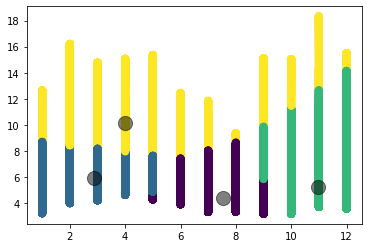

In [4]:
# Train the model
kmeans = KMeans(n_clusters=4).fit(selected_month_data)
# Run predictions
kmeans_predict = kmeans.predict(selected_month_data)

# Plot results
plt.scatter(selected_month_data[["month"]], selected_month_data["flow_rate_ft"], c=kmeans_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)